In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [68]:
df = pd.read_csv('./data/default.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [70]:
df_clean = df.drop(index=0).reset_index(drop=True)

df_clean = df_clean.drop(df_clean.columns[0], axis=1)

df_clean = df_clean.dropna()

df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

df_clean = pd.get_dummies(df_clean, columns=['X2'], drop_first=True).astype(int)

# Create the new ratio columns using df_clean
df_clean['X12_X1'] = df_clean['X12'] / (df_clean['X1'] + 1e-6)  # Ratio of September bill to Total Credit
df_clean['X18_X12'] = df_clean['X18'] / (df_clean['X12'] + 1e-6)  # Ratio of September payment to September bill

# Drop the columns from df_clean
df_clean = df_clean.drop(columns=['X4'] + [f'X{i}' for i in range(7, 24)])

# Display the result
df_clean.head()

,X1,X3,X5,X6,Y,X2_2,X12_X1,X18_X12
0,20000,2,24,2,1,1,0.195650,0.000000
1,120000,2,26,-1,1,1,0.022350,0.000000
2,90000,2,34,0,0,1,0.324878,0.051917
3,50000,2,37,0,0,1,0.939800,0.042562
4,50000,2,57,-1,0,0,0.172340,0.232099


In [72]:
X = df_clean[['X1', 'X3', 'X5', 'X6', 'X2_2', 'X12_X1', 'X18_X12']]
y = df_clean['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.7787777777777778
Confusion Matrix:
[[7009    0]
 [1991    0]]


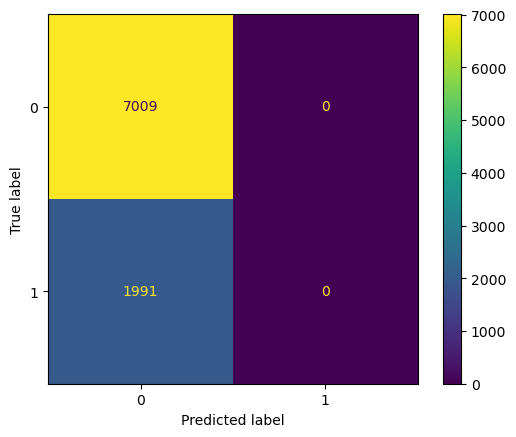

In [84]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()